In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl

In [2]:
df_train = pd.read_excel('Personal Calling List Train.xlsx')
df_test = pd.read_excel('Personal Calling List Test.xlsx')

In [3]:
df_train = df_train.drop(['prediction_val', 'Probability_Score'], axis = 1)
df_test = df_test.drop(['prediction_val', 'Probability_Score'], axis = 1)

In [4]:
df_train.head()

,CURRENT_DELINQUENCY_STATUS,NUM_OF_DR_TRANS_MONTH5,NUM_OF_CR_TRANS_MONTH5,MONTH5_MONTH4_INCREASED_TRANSACTIONS_PERCENTAGE,MONTH5_MONTH4_HIGHEST_DEBIT_TRANSACTIONS,PRINCIPALOUTSTANDING,CR_TOT_3_MONTH_AVG,TOTAL_TRANSACTIONS_6_MONTH_AVG,INCREASED_EARNINGS_PERCENTAGE_6_MONTH_AVG,HIGHEST_CREDIT_TRANSACTIONS_6_MONTH_AVG,...,Primary_Parish|KINGSTON,Primary_Parish|MANCHESTER,Primary_Parish|ST ANDREW,Primary_Parish|ST ANN,Primary_Parish|ST CATHERINE,Primary_Parish|ST ELIZABETH,Primary_Parish|ST JAMES,Primary_Parish|WESTMORELAND,Primary_Parish|others,Primary_Parish|None
0,1,-0.598880,-0.344876,1.372685,-0.030944,-0.257803,-0.451644,-0.219491,0.011802,-0.182279,...,0,0,0,0,1,0,0,0,0,0
1,0,1.308174,0.697767,-0.293297,-0.128282,-0.223014,0.671407,0.967138,0.011802,0.488579,...,0,0,0,0,0,0,0,0,1,0
2,1,-0.598880,-0.344876,-0.293297,-0.030633,1.464740,0.942281,-0.615034,0.011802,0.020723,...,0,0,0,0,1,0,0,0,0,0
3,0,1.308174,1.740411,0.817357,-0.030938,0.450065,0.776598,0.769366,0.011802,0.207845,...,0,0,0,0,0,1,0,0,0,0
4,1,-0.598880,-0.344876,-0.293297,-0.030698,0.109370,-0.562544,-0.377708,0.011802,0.066229,...,0,0,0,0,0,1,0,0,0,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6406 entries, 0 to 6405
Data columns (total 46 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CURRENT_DELINQUENCY_STATUS                          6406 non-null   int64  
 1   NUM_OF_DR_TRANS_MONTH5                              6406 non-null   float64
 2   NUM_OF_CR_TRANS_MONTH5                              6406 non-null   float64
 3   MONTH5_MONTH4_INCREASED_TRANSACTIONS_PERCENTAGE     6406 non-null   float64
 4   MONTH5_MONTH4_HIGHEST_DEBIT_TRANSACTIONS            6406 non-null   float64
 5   PRINCIPALOUTSTANDING                                6406 non-null   float64
 6   CR_TOT_3_MONTH_AVG                                  6406 non-null   float64
 7   TOTAL_TRANSACTIONS_6_MONTH_AVG                      6406 non-null   float64
 8   INCREASED_EARNINGS_PERCENTAGE_6_MONTH_AVG           6406 non-null   float64
 9

In [6]:
X_Train = df_train.drop('CURRENT_DELINQUENCY_STATUS', axis = 1).copy()

In [7]:
Y_Train = df_train['CURRENT_DELINQUENCY_STATUS'].copy()

In [8]:
X_Test = df_test.drop('CURRENT_DELINQUENCY_STATUS', axis = 1).copy()

In [9]:
Y_Test = df_test['CURRENT_DELINQUENCY_STATUS'].copy()

In [23]:
target = 'CURRENT_DELINQUENCY_STATUS'
features = [x for x in list(df_train.columns) if x != target]

# Define the model
model = Sequential()
model.add(Dense(256, input_dim=len(features), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               11776     
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 32,449
Trainable params: 32,449
Non-trai

In [24]:
import keras
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

opts = Adam(learning_rate=0.01)
model.compile(
    optimizer=opts, loss="binary_crossentropy", metrics=metrics
)

model.fit(
    X_Train,
    Y_Train,
    batch_size=64,
    epochs=100,
    verbose=2,
    validation_data=(X_Test, Y_Test))

Epoch 1/100
101/101 - 2s - loss: 0.6087 - fn: 1433.0000 - fp: 582.0000 - tn: 3074.0000 - tp: 1317.0000 - precision: 0.6935 - recall: 0.4789 - val_loss: 0.5404 - val_fn: 345.0000 - val_fp: 96.0000 - val_tn: 817.0000 - val_tp: 344.0000 - val_precision: 0.7818 - val_recall: 0.4993 - 2s/epoch - 22ms/step
Epoch 2/100
101/101 - 0s - loss: 0.5817 - fn: 1398.0000 - fp: 435.0000 - tn: 3221.0000 - tp: 1352.0000 - precision: 0.7566 - recall: 0.4916 - val_loss: 0.5604 - val_fn: 306.0000 - val_fp: 134.0000 - val_tn: 779.0000 - val_tp: 383.0000 - val_precision: 0.7408 - val_recall: 0.5559 - 259ms/epoch - 3ms/step
Epoch 3/100
101/101 - 0s - loss: 0.5661 - fn: 1394.0000 - fp: 413.0000 - tn: 3243.0000 - tp: 1356.0000 - precision: 0.7665 - recall: 0.4931 - val_loss: 0.5449 - val_fn: 336.0000 - val_fp: 92.0000 - val_tn: 821.0000 - val_tp: 353.0000 - val_precision: 0.7933 - val_recall: 0.5123 - 240ms/epoch - 2ms/step
Epoch 4/100
101/101 - 0s - loss: 0.5551 - fn: 1379.0000 - fp: 393.0000 - tn: 3263.0000 - 

Epoch 28/100
101/101 - 0s - loss: 0.4446 - fn: 1273.0000 - fp: 191.0000 - tn: 3465.0000 - tp: 1477.0000 - precision: 0.8855 - recall: 0.5371 - val_loss: 0.8931 - val_fn: 332.0000 - val_fp: 125.0000 - val_tn: 788.0000 - val_tp: 357.0000 - val_precision: 0.7407 - val_recall: 0.5181 - 341ms/epoch - 3ms/step
Epoch 29/100
101/101 - 0s - loss: 0.4372 - fn: 1295.0000 - fp: 170.0000 - tn: 3486.0000 - tp: 1455.0000 - precision: 0.8954 - recall: 0.5291 - val_loss: 0.8834 - val_fn: 323.0000 - val_fp: 127.0000 - val_tn: 786.0000 - val_tp: 366.0000 - val_precision: 0.7424 - val_recall: 0.5312 - 305ms/epoch - 3ms/step
Epoch 30/100
101/101 - 0s - loss: 0.4314 - fn: 1262.0000 - fp: 213.0000 - tn: 3443.0000 - tp: 1488.0000 - precision: 0.8748 - recall: 0.5411 - val_loss: 0.9419 - val_fn: 334.0000 - val_fp: 105.0000 - val_tn: 808.0000 - val_tp: 355.0000 - val_precision: 0.7717 - val_recall: 0.5152 - 352ms/epoch - 3ms/step
Epoch 31/100
101/101 - 0s - loss: 0.4285 - fn: 1280.0000 - fp: 152.0000 - tn: 3504

Epoch 55/100
101/101 - 0s - loss: 0.3800 - fn: 1177.0000 - fp: 116.0000 - tn: 3540.0000 - tp: 1573.0000 - precision: 0.9313 - recall: 0.5720 - val_loss: 1.5073 - val_fn: 333.0000 - val_fp: 113.0000 - val_tn: 800.0000 - val_tp: 356.0000 - val_precision: 0.7591 - val_recall: 0.5167 - 247ms/epoch - 2ms/step
Epoch 56/100
101/101 - 0s - loss: 0.3745 - fn: 1195.0000 - fp: 135.0000 - tn: 3521.0000 - tp: 1555.0000 - precision: 0.9201 - recall: 0.5655 - val_loss: 1.6151 - val_fn: 352.0000 - val_fp: 94.0000 - val_tn: 819.0000 - val_tp: 337.0000 - val_precision: 0.7819 - val_recall: 0.4891 - 246ms/epoch - 2ms/step
Epoch 57/100
101/101 - 0s - loss: 0.3777 - fn: 1190.0000 - fp: 125.0000 - tn: 3531.0000 - tp: 1560.0000 - precision: 0.9258 - recall: 0.5673 - val_loss: 1.4142 - val_fn: 347.0000 - val_fp: 97.0000 - val_tn: 816.0000 - val_tp: 342.0000 - val_precision: 0.7790 - val_recall: 0.4964 - 243ms/epoch - 2ms/step
Epoch 58/100
101/101 - 0s - loss: 0.3816 - fn: 1214.0000 - fp: 102.0000 - tn: 3554.0

Epoch 82/100
101/101 - 0s - loss: 0.3534 - fn: 1166.0000 - fp: 113.0000 - tn: 3543.0000 - tp: 1584.0000 - precision: 0.9334 - recall: 0.5760 - val_loss: 2.0690 - val_fn: 342.0000 - val_fp: 116.0000 - val_tn: 797.0000 - val_tp: 347.0000 - val_precision: 0.7495 - val_recall: 0.5036 - 228ms/epoch - 2ms/step
Epoch 83/100
101/101 - 0s - loss: 0.3396 - fn: 1141.0000 - fp: 108.0000 - tn: 3548.0000 - tp: 1609.0000 - precision: 0.9371 - recall: 0.5851 - val_loss: 2.4598 - val_fn: 329.0000 - val_fp: 132.0000 - val_tn: 781.0000 - val_tp: 360.0000 - val_precision: 0.7317 - val_recall: 0.5225 - 242ms/epoch - 2ms/step
Epoch 84/100
101/101 - 0s - loss: 0.3456 - fn: 1108.0000 - fp: 123.0000 - tn: 3533.0000 - tp: 1642.0000 - precision: 0.9303 - recall: 0.5971 - val_loss: 2.0324 - val_fn: 345.0000 - val_fp: 110.0000 - val_tn: 803.0000 - val_tp: 344.0000 - val_precision: 0.7577 - val_recall: 0.4993 - 266ms/epoch - 3ms/step
Epoch 85/100
101/101 - 0s - loss: 0.3461 - fn: 1149.0000 - fp: 93.0000 - tn: 3563.

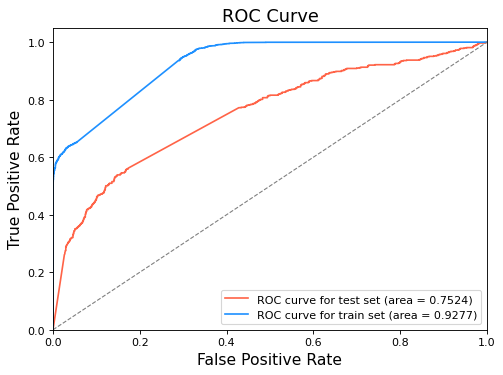

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

# Get predictions

train_set_preds = [round(x[0]) for x in model.predict(X_Train)]
test_set_preds = [round(x[0]) for x in model.predict(X_Test)]

train_preds = [x[0] for x in model.predict(X_Train)]
test_preds = [x[0] for x in model.predict(X_Test)]

# Get AUC and ROC
train_fpr, train_tpr, train_thresholds = roc_curve(Y_Train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_Test, test_preds)
train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Visualize ROC curve
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [26]:
print(f'Confusion Matrix for Train Data:\n {confusion_matrix(Y_Train, train_set_preds)}')
print('\n')
print(f'Confusion Matrix for Test Data:\n {confusion_matrix(Y_Test, test_set_preds)}')

Confusion Matrix for Train Data:
 [[3501  155]
 [ 983 1767]]


Confusion Matrix for Test Data:
 [[763 150]
 [312 377]]


In [27]:
print('Accuracy Score:', accuracy_score(Y_Train, train_set_preds))
print('\n')
print(classification_report(Y_Train, train_set_preds))

Accuracy Score: 0.8223540430846081


              precision    recall  f1-score   support

           0       0.78      0.96      0.86      3656
           1       0.92      0.64      0.76      2750

    accuracy                           0.82      6406
   macro avg       0.85      0.80      0.81      6406
weighted avg       0.84      0.82      0.82      6406



In [28]:
print('Accuracy Score:', accuracy_score(Y_Test, test_set_preds))
print(classification_report(Y_Test, test_set_preds))

Accuracy Score: 0.7116104868913857
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       913
           1       0.72      0.55      0.62       689

    accuracy                           0.71      1602
   macro avg       0.71      0.69      0.69      1602
weighted avg       0.71      0.71      0.70      1602

